In [3]:
from google.colab import files
uploaded = files.upload()


Saving retail_sales_dataset.csv to retail_sales_dataset.csv


In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('retail_sales_dataset.csv')

# Display basic information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
# Check for missing values
print("Missing values before handling:")
print(data.isnull().sum())

# Fill missing values or drop rows/columns as needed
# Using the recommended ffill() method
data.ffill(inplace=True)

print("\nMissing values after handling:")
print(data.isnull().sum())

Missing values before handling:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Missing values after handling:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [8]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Ensure 'Total Amount' is numeric
# The column containing sales data is 'Total Amount', not 'Sales'
data['Total Amount'] = pd.to_numeric(data['Total Amount'], errors='coerce')

# Display the data types after conversion
print("Data types after conversion:")
print(data.dtypes)

Data types after conversion:
Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object


In [9]:
# Summary statistics for numerical columns
data.describe()

# Mode for categorical columns
data['Product Category'].mode()


,Product Category
0,Clothing


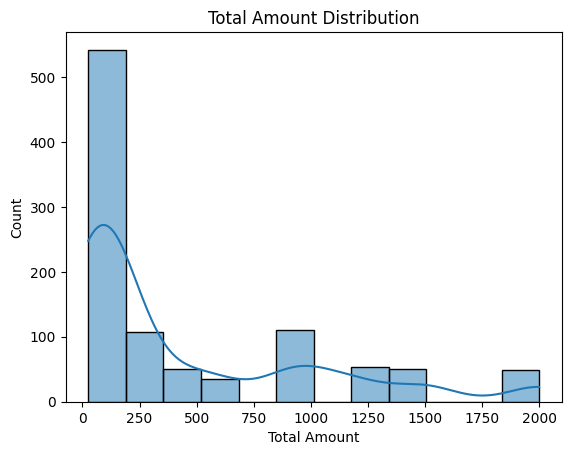

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for 'Total Amount'
sns.histplot(data['Total Amount'], kde=True)
plt.title('Total Amount Distribution')
plt.show()

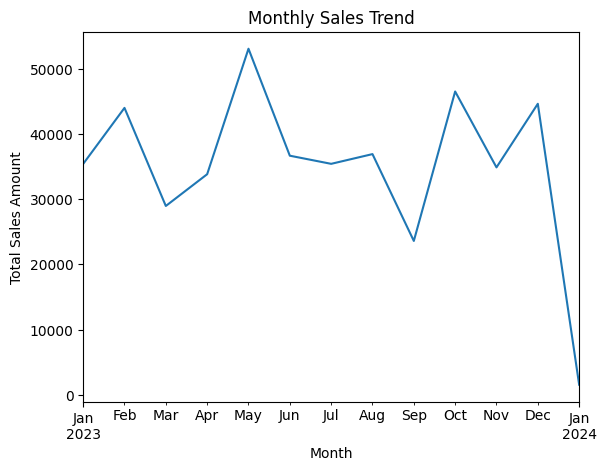

In [13]:
# Group by month and sum sales
monthly_sales = data.groupby(data['Date'].dt.to_period('M'))['Total Amount'].sum()

# Plot sales trend
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.show()

In [17]:
# Group by 'Customer ID' and sum sales
top_customers = data.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False)

# Display top 10 customers
top_customers.head(10)

,Total Amount
Customer ID,
CUST015,2000
CUST412,2000
CUST970,2000
CUST547,2000
CUST281,2000
CUST416,2000
CUST420,2000
CUST927,2000
CUST447,2000


In [19]:
# Group by 'Product Category' and sum sales
top_products = data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Display top 10 products
top_products.head(10)

,Total Amount
Product Category,
Electronics,156905
Clothing,155580
Beauty,143515


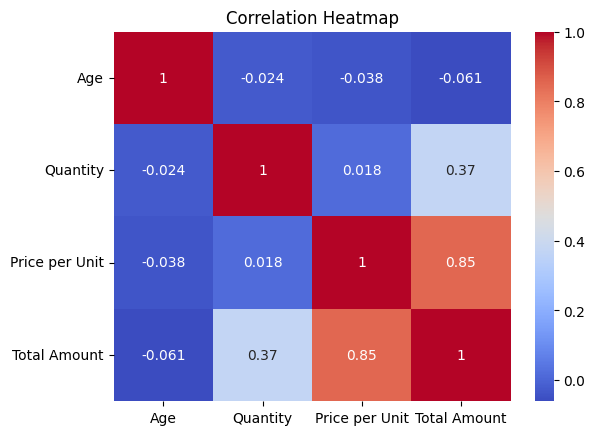

In [21]:
# Select only numerical columns for correlation analysis
numerical_data = data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']]

# Correlation matrix
corr_matrix = numerical_data.corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()